In [4]:
import pandas as pd
import os
import dask.dataframe as dd
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
import scanpy as sc
import numpy as np
import seaborn as sns
from sanbomics.plots import volcano
from imblearn.over_sampling import SMOTE

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
#pd.set_option("display.max_rows", None)
pd.options.mode.copy_on_write = True

In [ ]:
all_counts_lusc = pd.read_csv(r"C:\Users\Yusuf\Desktop\staj\marmara\combined_stranded_lusc_matrix.csv")
all_counts_lusc.set_index("gene_id", inplace=True)

all_counts_luad = pd.read_csv(r"C:\Users\Yusuf\Desktop\staj\marmara\combined_stranded_luad_matrix.csv")
all_counts_luad.set_index("gene_id", inplace=True)

In [ ]:
all_counts_luad = all_counts_luad.sort_index(axis=1)                    # bu üç kodda sample adlarımızı basitleştirdik(sadece reset_index yapsam daha mantıklıydı muhtemelen)
all_counts_luad.columns = all_counts_luad.columns.astype(str)           # tamamen boş olan genlerden kurtulduk burda
all_counts_luad = all_counts_luad[all_counts_luad.sum(axis = 1) > 0]    # verimizi işleme hazır hâle getirmek için transpose'unu alıyoruz

all_counts_lusc = all_counts_lusc.sort_index(axis=1)                    # bu üç kodda sample adlarımızı basitleştirdik(sadece reset_index yapsam daha mantıklıydı muhtemelen)
all_counts_lusc.columns = all_counts_lusc.columns.astype(str)           # tamamen boş olan genlerden kurtulduk burda
all_counts_lusc = all_counts_lusc[all_counts_lusc.sum(axis = 1) > 0]    # verimizi işleme hazır hâle getirmek için transpose'unu alıyoruz

In [ ]:
all_counts_luad

,sample_1,sample_10,sample_100,sample_101,sample_102,sample_103,sample_104_control,sample_105,sample_106_control,sample_107_control,sample_108,sample_109,sample_110,sample_111,sample_112,sample_113,sample_114,sample_115,sample_116,sample_117,sample_118_control,sample_119_control,sample_11_control,sample_12,sample_120,sample_121,sample_122,sample_123,sample_124_control,sample_125,sample_126,sample_127,sample_128,sample_129_control,sample_13,sample_130,sample_131,sample_132,sample_133,sample_134,sample_135,sample_136,sample_137,sample_138,sample_139_control,sample_14,sample_140,sample_141_control,sample_142,sample_143,...,sample_595,sample_596,sample_597,sample_598,sample_599_control,sample_6,sample_60,sample_600,sample_61,sample_62,sample_63,sample_64_control,sample_65,sample_66,sample_67,sample_68,sample_69,sample_7,sample_70,sample_71,sample_72_control,sample_73,sample_74,sample_75_control,sample_76,sample_77,sample_78,sample_79,sample_8,sample_80,sample_81,sample_82,sample_83,sample_84_control,sample_85,sample_86,sample_87,sample_88,sample_89,sample_9,sample_90,sample_91,sample_92_control,sample_93,sample_94,sample_95,sample_96,sample_97,sample_98,sample_99
gene_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.15,0,2405,900,945,775,1426,961,1139,752,605,2253,1671,2594,346,463,1487,1962,935,1207,284,1836,2392,396,1172,400,4018,0,2977,1623,883,1279,3553,805,1800,1322,1946,1953,4251,1096,2309,621,2348,2077,2621,1899,2023,3656,1604,961,1,...,1981,1232,800,1317,1479,1729,752,382,0,4425,1855,1052,934,2579,4537,1980,3564,1176,472,1297,266,628,579,1507,1174,573,559,1284,1341,1053,1159,418,785,1912,2283,2223,2167,1782,723,4306,0,1684,1206,1588,663,513,609,3177,1203,1137
ENSG00000000005.6,16,2,1,0,68,1,2,0,1,2,0,5,1,54,0,0,1,3,0,1,1,0,1,2,2,27,2,0,0,0,1,0,0,97,4,0,3,1,0,0,0,0,0,0,5,0,2,0,0,10,...,1,7,0,0,1,9,0,4,16,0,9,0,3,0,1,2,1,0,0,0,1,0,0,0,0,0,0,1,0,2,1,0,0,0,0,0,1,157,0,1,41,1,0,1,0,0,0,0,1,0
ENSG00000000419.13,10,763,717,551,265,524,472,890,600,371,538,489,824,444,378,1128,1527,843,462,696,926,816,450,496,488,1563,11,1324,788,320,752,996,665,474,790,1450,900,1157,812,1331,1979,798,1298,624,827,1666,762,459,1045,22,...,1156,660,649,802,394,837,982,396,12,708,351,514,470,1377,2309,1234,566,721,649,377,344,203,790,729,848,256,619,1967,589,493,428,521,598,785,656,1034,1237,413,584,1137,50,1277,524,1010,696,595,679,1008,1365,1996
ENSG00000000457.14,247,1657,450,680,261,375,195,265,458,284,854,299,723,478,246,1216,1146,961,523,404,619,432,216,952,247,850,138,703,927,309,444,796,312,387,816,1441,963,1165,643,1323,314,657,1063,773,791,631,565,542,806,505,...,1205,673,526,597,619,670,544,423,328,914,347,603,371,898,844,1020,891,662,1045,417,305,210,577,725,667,124,846,898,551,321,955,722,472,628,807,1210,1729,574,381,864,447,558,488,538,289,361,802,552,708,1850
ENSG00000000460.17,414,924,225,530,175,263,197,210,445,111,348,187,604,295,146,825,1006,492,290,298,325,466,127,390,128,471,243,990,516,157,328,457,167,231,492,1223,681,902,474,791,271,515,997,584,432,610,423,324,475,247,...,841,533,280,486,375,492,492,224,313,531,167,323,316,967,862,471,365,537,608,246,143,87,384,406,426,101,724,409,384,181,478,365,355,401,929,631,1282,431,295,577,651,580,378,413,291,175,760,399,880,1304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000288667.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSG00000288669.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0

In [ ]:
all_counts_lusc

,sample_1,sample_10,sample_100,sample_101_control,sample_102,sample_103,sample_104,sample_105,sample_106_control,sample_107,sample_108,sample_109,sample_11,sample_110,sample_111,sample_112,sample_113,sample_114,sample_115,sample_116,sample_117,sample_118,sample_119,sample_12,sample_120,sample_121_control,sample_122,sample_123,sample_124,sample_125,sample_126,sample_127,sample_128,sample_129,sample_13,sample_130,sample_131,sample_132,sample_133,sample_134,sample_135,sample_136,sample_137,sample_138,sample_139,sample_14,sample_140,sample_141,sample_142,sample_143,...,sample_552,sample_553,sample_56_control,sample_57,sample_58_control,sample_59,sample_6,sample_60,sample_61,sample_62,sample_63,sample_64_control,sample_65,sample_66,sample_67,sample_68,sample_69,sample_7,sample_70,sample_71,sample_72,sample_73,sample_74,sample_75,sample_76,sample_77,sample_78,sample_79,sample_8,sample_80,sample_81,sample_82_control,sample_83_control,sample_84,sample_85_control,sample_86_control,sample_87_control,sample_88,sample_89,sample_9,sample_90,sample_91,sample_92,sample_93,sample_94,sample_95,sample_96,sample_97,sample_98,sample_99
gene_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.15,1050,738,671,864,1306,2243,570,646,997,513,446,2406,1576,1730,1219,1568,2098,1347,1301,979,1313,1531,1073,3271,1636,1225,1162,2052,876,1570,278,3037,622,1628,1311,1631,1941,1002,186,2754,1157,1272,1974,1241,4669,2449,1296,1324,1615,530,...,2479,1240,1107,2289,1694,1109,844,1706,324,1160,565,1178,2270,2317,2055,1335,475,2542,1767,3774,1310,932,1531,2039,736,3656,1508,1816,1500,2007,2621,1305,1514,1779,1546,8096,1697,1511,1264,1323,1852,5254,811,1062,1166,671,680,566,485,1857
ENSG00000000005.6,0,0,0,0,0,0,0,1,0,7,1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,3,0,0,2,0,0,0,0,0,1,2,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,1,0,1,0,0,1,1,0,0,2,1,1,2,0,0,1,2,1,0,0,7,3,1,0,0,0,1,0,4,0,1
ENSG00000000419.13,905,701,753,793,3092,1355,713,753,342,303,358,1886,597,1034,1236,2101,1100,770,1878,1679,3782,1655,1246,1884,990,909,1663,1401,772,758,507,2495,711,1282,1519,1072,945,1183,1249,1226,1344,894,1244,537,2253,938,3575,1116,2880,995,...,1228,812,1470,981,499,902,786,1494,936,1193,332,890,1178,1547,1015,1221,259,829,963,2424,379,877,1475,1980,1580,2069,593,1003,1186,1051,1435,1163,1018,966,1436,4669,859,984,858,1139,1659,2158,861,1284,2072,679,690,701,493,1149
ENSG00000000457.14,342,190,638,273,1710,976,338,677,390,258,289,1143,351,579,706,1298,449,507,1225,1106,378,558,567,1517,518,807,750,898,587,665,268,772,636,803,568,852,521,270,892,2619,733,475,2872,430,914,641,586,765,783,386,...,542,601,993,612,475,836,402,1017,304,438,260,526,884,881,597,538,174,669,260,637,486,583,595,912,490,929,607,840,746,568,903,663,613,448,482,585,643,472,603,620,1226,1248,548,970,762,460,498,559,296,759
ENSG00000000460.17,264,193,365,291,1474,1093,240,326,323,212,275,577,255,777,518,1580,305,486,1141,1046,439,734,577,1337,546,435,630,735,291,614,200,767,473,743,432,804,503,275,442,2926,879,435,3135,446,914,638,637,661,916,501,...,434,632,1005,439,529,780,228,1127,240,430,148,340,988,895,518,592,168,796,310,756,539,540,513,1005,246,1016,583,707,674,535,792,459,337,416,391,502,547,506,669,750,928,1383,582,923,642,524,434,273,162,655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000288667.1,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSG00000288669.1,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0

In [ ]:
# Örnek all_counts1 DataFrame'i (sütun isimleri)
columns_luad = all_counts_luad.columns
columns_lusc = all_counts_lusc.columns

# Yeni DataFrame oluşturma
metadata_luad = pd.DataFrame(columns_luad, columns=["Sample"])
metadata_luad.set_index("Sample", inplace=True)

metadata_lusc = pd.DataFrame(columns_lusc, columns=["Sample"])
metadata_lusc.set_index("Sample", inplace=True)

# Condition sütununu oluşturma
metadata_luad["Condition"] = metadata_luad.index.map(lambda x: "C" if "control" in x else "RS")
metadata_lusc["Condition"] = metadata_lusc.index.map(lambda x: "C" if "control" in x else "RS")

metadata_lusc, metadata_luad

(                   Condition
 Sample                      
 sample_1                  RS
 sample_10                 RS
 sample_100                RS
 sample_101_control         C
 sample_102                RS
 ...                      ...
 sample_95                 RS
 sample_96                 RS
 sample_97                 RS
 sample_98                 RS
 sample_99                 RS
 
 [553 rows x 1 columns],
            Condition
 Sample              
 sample_1          RS
 sample_10         RS
 sample_100        RS
 sample_101        RS
 sample_102        RS
 ...              ...
 sample_95         RS
 sample_96         RS
 sample_97         RS
 sample_98         RS
 sample_99         RS
 
 [600 rows x 1 columns])

In [ ]:
# # Silinecek satırların indekslerini rastgele seçme
# num_to_drop = int(0.8 * metadata_lusc[metadata_lusc["Condition"] == 'RS'].shape[0])  # %80'i hesaplama
# drop_indices = np.random.choice(metadata_lusc[metadata_lusc['Condition'] == 'RS'].index, size=num_to_drop, replace=False)
# 
# # Seçilen satırları silme
# metadata_lusc.drop(index=drop_indices, inplace=True)
# 
# metadata_lusc

In [ ]:
all_counts_luad = all_counts_luad.T
all_counts_lusc = all_counts_lusc.T

In [ ]:
all_counts_luad

gene_id,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,ENSG00000001460.18,ENSG00000001461.17,ENSG00000001497.18,ENSG00000001561.7,ENSG00000001617.12,ENSG00000001626.16,ENSG00000001629.10,ENSG00000001630.17,ENSG00000001631.16,ENSG00000002016.18,ENSG00000002079.14,ENSG00000002330.14,ENSG00000002549.12,ENSG00000002586.20,ENSG00000002587.10,ENSG00000002726.21,ENSG00000002745.13,ENSG00000002746.15,ENSG00000002822.15,ENSG00000002834.18,ENSG00000002919.15,ENSG00000002933.9,ENSG00000003056.8,ENSG00000003096.14,ENSG00000003137.8,ENSG00000003147.19,ENSG00000003249.15,ENSG00000003393.15,ENSG00000003400.15,ENSG00000003402.20,ENSG00000003436.16,ENSG00000003509.16,ENSG00000003756.17,ENSG00000003987.14,ENSG00000003989.18,ENSG00000004059.11,ENSG00000004139.14,ENSG00000004142.12,ENSG00000004399.13,ENSG00000004455.17,...,ENSG00000288578.1,ENSG00000288579.1,ENSG00000288580.1,ENSG00000288581.1,ENSG00000288582.2,ENSG00000288583.1,ENSG00000288584.1,ENSG00000288585.1,ENSG00000288586.1,ENSG00000288587.1,ENSG00000288588.1,ENSG00000288589.1,ENSG00000288593.1,ENSG00000288595.1,ENSG00000288596.2,ENSG00000288597.1,ENSG00000288598.1,ENSG00000288600.1,ENSG00000288601.1,ENSG00000288602.1,ENSG00000288603.1,ENSG00000288604.1,ENSG00000288605.1,ENSG00000288607.1,ENSG00000288610.1,ENSG00000288611.1,ENSG00000288612.1,ENSG00000288615.1,ENSG00000288616.1,ENSG00000288617.1,ENSG00000288618.1,ENSG00000288622.1,ENSG00000288631.1,ENSG00000288632.1,ENSG00000288637.1,ENSG00000288638.1,ENSG00000288642.1,ENSG00000288648.1,ENSG00000288656.1,ENSG00000288657.1,ENSG00000288658.1,ENSG00000288659.1,ENSG00000288660.1,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288674.1,ENSG00000288675.1
sample_1,0,16,10,247,414,0,3,28,3,4,66,8,30,7,1,37,10,5,4,92,72,20,16,1,17,3,9,7,0,8,30,1,55,0,2,9,12,0,1,105,603,95,8,629,18,0,761,216,2,7,...,0,0,0,15,0,0,0,63,5,0,0,26,0,2,1,2,143,2,0,0,0,0,0,0,0,1,31,1,0,0,0,0,0,0,6,0,2251,0,0,0,2,0,0,0,4,0,0,0,1,8
sample_10,2405,2,763,1657,924,760,596,1171,1405,1504,1095,4981,1630,1344,718,1537,1873,87,356,703,55,2262,2796,2191,1071,64,12,22,41,11904,737,553,2529,20,36,1886,1512,919,1343,5966,2405,432,4467,152,205,2997,3611,3570,4090,6520,...,0,0,1,1,0,0,0,20,18,0,0,0,1,0,153,3,54,7,0,0,0,20,2,0,6,3,174,0,0,0,0,0,0,1,2,120,0,0,0,0,11,0,13,0,72,0,0,209,9,85
sample_100,900,1,717,450,225,1920,3175,2175,603,699,400,1967,1129,1627,2175,1317,1263,101,155,176,2,1681,3704,5209,192,33,0,14,15,11631,925,2174,3511,93,106,671,588,788,1398,7001,7832,407,2063,256,1446,2778,1727,3514,12510,3547,...,0,2,1,0,0,0,0,3,15,0,0,0,3,0,41,4,70,0,0,0,0,26,0,0,0,1,20,0,0,0,0,0,0,0,0,0,5,0,1,0,23,0,0,0,8,0,0,145,7,16
sample_101,945,0,551,680,530,838,1072,1209,372,1812,312,1006,1206,238,1015,298,2053,49,140,102,35,954,3572,3471,383,41,6,5,22,12854,642,1213,1502,30,30,1659,1159,606,1029,6347,4329,511,2707,100,246,2144,852,3089,5621,3309,...,0,0,0,0,0,2,0,2,7,0,0,0,0,0,79,0,39,2,0,1,0,6,0,0,0,1,77,0,0,0,0,0,0,0,4,0,4,0,0,0,51,0,0,0,25,0,0,165,3,14
sample_102,775,68,265,261,175,255,1403,1028,950,414,201,640,758,544,342,4,776,29,72,104,24,945,792,4806,165,1423,3,49,10,7302,428,1596,1051,1,96,1098,558,379,640,3281,1124,239,1640,64,67,1244,1027,2759,3248,2787,...,0,1,0,0,0,0,0,1,9,1,0,0,0,0,35,4,36,0,0,0,0,4,2,0,0,10,25,0,0,1,0,0,0,0,1,13,6,0,0,0,22,0,0,0,12,0,0,69,7,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_95,513,0,595,361,175,2034,1420,1099,355,777,247,1173,593,1217,1652,699,1088,62,111,179,9,643,3124,3155,237,11,3,2,11,5091,574,

In [ ]:
all_counts_lusc

gene_id,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,ENSG00000001460.18,ENSG00000001461.17,ENSG00000001497.18,ENSG00000001561.7,ENSG00000001617.12,ENSG00000001626.16,ENSG00000001629.10,ENSG00000001630.17,ENSG00000001631.16,ENSG00000002016.18,ENSG00000002079.14,ENSG00000002330.14,ENSG00000002549.12,ENSG00000002586.20,ENSG00000002587.10,ENSG00000002726.21,ENSG00000002745.13,ENSG00000002746.15,ENSG00000002822.15,ENSG00000002834.18,ENSG00000002919.15,ENSG00000002933.9,ENSG00000003056.8,ENSG00000003096.14,ENSG00000003137.8,ENSG00000003147.19,ENSG00000003249.15,ENSG00000003393.15,ENSG00000003400.15,ENSG00000003402.20,ENSG00000003436.16,ENSG00000003509.16,ENSG00000003756.17,ENSG00000003987.14,ENSG00000003989.18,ENSG00000004059.11,ENSG00000004139.14,ENSG00000004142.12,ENSG00000004399.13,ENSG00000004455.17,...,ENSG00000288577.1,ENSG00000288578.1,ENSG00000288579.1,ENSG00000288580.1,ENSG00000288581.1,ENSG00000288582.2,ENSG00000288583.1,ENSG00000288584.1,ENSG00000288585.1,ENSG00000288586.1,ENSG00000288587.1,ENSG00000288588.1,ENSG00000288589.1,ENSG00000288593.1,ENSG00000288595.1,ENSG00000288596.2,ENSG00000288597.1,ENSG00000288598.1,ENSG00000288600.1,ENSG00000288602.1,ENSG00000288603.1,ENSG00000288604.1,ENSG00000288605.1,ENSG00000288607.1,ENSG00000288610.1,ENSG00000288611.1,ENSG00000288612.1,ENSG00000288615.1,ENSG00000288616.1,ENSG00000288617.1,ENSG00000288618.1,ENSG00000288622.1,ENSG00000288627.1,ENSG00000288632.1,ENSG00000288637.1,ENSG00000288638.1,ENSG00000288642.1,ENSG00000288648.1,ENSG00000288656.1,ENSG00000288657.1,ENSG00000288658.1,ENSG00000288659.1,ENSG00000288660.1,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288674.1,ENSG00000288675.1
sample_1,1050,0,905,342,264,442,2231,1438,2014,393,293,911,1060,126,3788,918,1448,68,129,220,22,855,2505,2703,872,34,58,23,23,4988,377,447,4204,441,82,67,780,455,526,2417,1345,231,1161,49,102,1498,893,1955,3124,1906,...,1,0,0,0,0,0,1,0,25,5,0,0,0,0,0,53,1,39,0,0,0,3,0,0,3,242,63,0,0,0,1,0,0,0,0,0,0,0,0,0,55,0,1,0,7,0,0,48,0,15
sample_10,738,0,701,190,193,263,1936,1150,1840,485,137,367,600,67,1468,21,862,22,78,618,28,507,1792,1523,291,6,0,13,10,3415,353,436,1251,288,97,765,292,387,574,2091,1497,251,907,25,375,961,298,1468,1069,2026,...,1,0,0,0,1,0,1,0,3,8,0,0,0,0,0,45,0,23,0,0,0,5,0,0,2,2,8,1,0,0,0,0,0,0,0,0,1,0,0,0,3,0,0,0,15,0,2,38,3,7
sample_100,671,0,753,638,365,1953,2669,1812,526,666,353,1875,710,2299,970,1340,1459,78,178,162,1,824,5256,5420,136,22,0,3,24,5478,745,1083,2869,79,339,508,210,801,1171,7701,8688,435,1952,237,1032,1405,1070,2221,5128,2840,...,0,0,2,1,2,0,1,0,6,6,0,0,0,0,0,25,6,77,0,1,0,3,0,0,1,2,25,0,0,0,0,0,0,0,0,0,38,0,0,0,13,0,0,0,5,0,0,131,4,4
sample_101_control,864,0,793,273,291,196,1502,1010,479,720,244,1037,1221,107,2502,112,835,46,75,92,103,812,1815,2079,128,29,1,21,48,3650,349,637,1652,69,560,54,53,396,260,1755,796,242,909,73,195,1704,620,2707,1759,1785,...,1,1,3,0,0,0,1,0,1,1,0,0,0,0,0,21,72,34,0,0,0,6,0,0,0,29,15,0,0,0,0,0,0,1,1,0,2,0,0,0,3,0,0,0,4,0,0,54,1,14
sample_102,1306,0,3092,1710,1474,552,1862,2988,7343,3062,395,986,2860,398,2704,17,3043,243,364,827,57,1184,3596,6673,231,43,13,70,56,7194,1025,1031,4477,932,460,684,384,2479,623,5650,1664,1207,3554,147,210,3885,1645,5832,3444,3717,...,7,1,5,4,0,0,2,0,11,56,0,0,0,3,2,243,14,209,0,1,0,14,0,0,5,99,146,0,0,1,0,0,0,0,2,1,20,0,1,0,40,0,1,1,66,0,0,349,7,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_95,671,1,679,460,524,266,442,772,6825,627,228,488,1039,219,659,110,82

In [ ]:
dds_luad = DeseqDataSet(counts=all_counts_luad, metadata=metadata_luad, design_factors="Condition")
dds_lusc = DeseqDataSet(counts=all_counts_lusc, metadata=metadata_lusc, design_factors="Condition")

dds_luad, dds_lusc

(AnnData object with n_obs × n_vars = 600 × 58179
     obs: 'Condition'
     obsm: 'design_matrix',
 AnnData object with n_obs × n_vars = 553 × 58457
     obs: 'Condition'
     obsm: 'design_matrix')

In [ ]:
res_luad = pd.read_csv(r"C:\Users\Yusuf\Desktop\staj\marmara\res_luad_lfc_padj_gene_id.csv")
res_luad.set_index("gene_id", inplace=True)
res_lusc = pd.read_csv(r"C:\Users\Yusuf\Desktop\staj\marmara\res_lusc_lfc_padj_gene_id.csv")
res_lusc.set_index("gene_id", inplace=True)

In [ ]:
# significant genlere göre filtreleme yapıyorum

sig_luad = res_luad[(res_luad["padj"] < 0.01) & (abs(res_luad["log2FoldChange"]) > 0.5) & (res_luad["baseMean"] > 10)]
sig_lusc = res_lusc[(res_lusc["padj"] < 0.01) & (abs(res_lusc["log2FoldChange"]) > 0.5) & (res_lusc["baseMean"] > 10)]

indexes_luad = sig_luad.index.tolist()
# all_counts_luad = all_counts_luad[indexes_luad]

indexes_lusc = sig_lusc.index.tolist()
# all_counts_lusc = all_counts_lusc[indexes_lusc]

res_indexes_luad = res_luad.index.tolist()
res_indexes_lusc = res_lusc.index.tolist()

dropped_indexes_lusc = metadata_lusc.index.tolist()

In [ ]:
all_counts_lusc = all_counts_lusc.T
all_counts_lusc = all_counts_lusc[dropped_indexes_lusc]
all_counts_lusc = all_counts_lusc.T
all_counts_lusc

gene_id,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,ENSG00000001460.18,ENSG00000001461.17,ENSG00000001497.18,ENSG00000001561.7,ENSG00000001617.12,ENSG00000001626.16,ENSG00000001629.10,ENSG00000001630.17,ENSG00000001631.16,ENSG00000002016.18,ENSG00000002079.14,ENSG00000002330.14,ENSG00000002549.12,ENSG00000002586.20,ENSG00000002587.10,ENSG00000002726.21,ENSG00000002745.13,ENSG00000002746.15,ENSG00000002822.15,ENSG00000002834.18,ENSG00000002919.15,ENSG00000002933.9,ENSG00000003056.8,ENSG00000003096.14,ENSG00000003137.8,ENSG00000003147.19,ENSG00000003249.15,ENSG00000003393.15,ENSG00000003400.15,ENSG00000003402.20,ENSG00000003436.16,ENSG00000003509.16,ENSG00000003756.17,ENSG00000003987.14,ENSG00000003989.18,ENSG00000004059.11,ENSG00000004139.14,ENSG00000004142.12,ENSG00000004399.13,ENSG00000004455.17,...,ENSG00000288577.1,ENSG00000288578.1,ENSG00000288579.1,ENSG00000288580.1,ENSG00000288581.1,ENSG00000288582.2,ENSG00000288583.1,ENSG00000288584.1,ENSG00000288585.1,ENSG00000288586.1,ENSG00000288587.1,ENSG00000288588.1,ENSG00000288589.1,ENSG00000288593.1,ENSG00000288595.1,ENSG00000288596.2,ENSG00000288597.1,ENSG00000288598.1,ENSG00000288600.1,ENSG00000288602.1,ENSG00000288603.1,ENSG00000288604.1,ENSG00000288605.1,ENSG00000288607.1,ENSG00000288610.1,ENSG00000288611.1,ENSG00000288612.1,ENSG00000288615.1,ENSG00000288616.1,ENSG00000288617.1,ENSG00000288618.1,ENSG00000288622.1,ENSG00000288627.1,ENSG00000288632.1,ENSG00000288637.1,ENSG00000288638.1,ENSG00000288642.1,ENSG00000288648.1,ENSG00000288656.1,ENSG00000288657.1,ENSG00000288658.1,ENSG00000288659.1,ENSG00000288660.1,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288674.1,ENSG00000288675.1
sample_1,1050,0,905,342,264,442,2231,1438,2014,393,293,911,1060,126,3788,918,1448,68,129,220,22,855,2505,2703,872,34,58,23,23,4988,377,447,4204,441,82,67,780,455,526,2417,1345,231,1161,49,102,1498,893,1955,3124,1906,...,1,0,0,0,0,0,1,0,25,5,0,0,0,0,0,53,1,39,0,0,0,3,0,0,3,242,63,0,0,0,1,0,0,0,0,0,0,0,0,0,55,0,1,0,7,0,0,48,0,15
sample_10,738,0,701,190,193,263,1936,1150,1840,485,137,367,600,67,1468,21,862,22,78,618,28,507,1792,1523,291,6,0,13,10,3415,353,436,1251,288,97,765,292,387,574,2091,1497,251,907,25,375,961,298,1468,1069,2026,...,1,0,0,0,1,0,1,0,3,8,0,0,0,0,0,45,0,23,0,0,0,5,0,0,2,2,8,1,0,0,0,0,0,0,0,0,1,0,0,0,3,0,0,0,15,0,2,38,3,7
sample_100,671,0,753,638,365,1953,2669,1812,526,666,353,1875,710,2299,970,1340,1459,78,178,162,1,824,5256,5420,136,22,0,3,24,5478,745,1083,2869,79,339,508,210,801,1171,7701,8688,435,1952,237,1032,1405,1070,2221,5128,2840,...,0,0,2,1,2,0,1,0,6,6,0,0,0,0,0,25,6,77,0,1,0,3,0,0,1,2,25,0,0,0,0,0,0,0,0,0,38,0,0,0,13,0,0,0,5,0,0,131,4,4
sample_101_control,864,0,793,273,291,196,1502,1010,479,720,244,1037,1221,107,2502,112,835,46,75,92,103,812,1815,2079,128,29,1,21,48,3650,349,637,1652,69,560,54,53,396,260,1755,796,242,909,73,195,1704,620,2707,1759,1785,...,1,1,3,0,0,0,1,0,1,1,0,0,0,0,0,21,72,34,0,0,0,6,0,0,0,29,15,0,0,0,0,0,0,1,1,0,2,0,0,0,3,0,0,0,4,0,0,54,1,14
sample_102,1306,0,3092,1710,1474,552,1862,2988,7343,3062,395,986,2860,398,2704,17,3043,243,364,827,57,1184,3596,6673,231,43,13,70,56,7194,1025,1031,4477,932,460,684,384,2479,623,5650,1664,1207,3554,147,210,3885,1645,5832,3444,3717,...,7,1,5,4,0,0,2,0,11,56,0,0,0,3,2,243,14,209,0,1,0,14,0,0,5,99,146,0,0,1,0,0,0,0,2,1,20,0,1,0,40,0,1,1,66,0,0,349,7,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_95,671,1,679,460,524,266,442,772,6825,627,228,488,1039,219,659,110,82

In [ ]:
newnames_luad = []
newnames_lusc = []

for i in all_counts_luad.index:
    if "control" in i:
        newnames_luad.append("LUAD_control")
    else:
        newnames_luad.append("LUAD")

for i in all_counts_lusc.index:
    if "control" in i:
        newnames_lusc.append("LUSC_control")
    else:
        newnames_lusc.append("LUSC")

In [ ]:
all_counts_luad = all_counts_luad.set_axis(newnames_luad)
all_counts_lusc = all_counts_lusc.set_axis(newnames_lusc)

metadata_luad = metadata_luad.set_axis(newnames_luad)
metadata_lusc = metadata_lusc.set_axis(newnames_lusc)

In [ ]:
all_counts = pd.concat([all_counts_luad, all_counts_lusc], axis=0)
all_metadata = pd.concat([metadata_luad, metadata_lusc], axis=0)

In [ ]:
all_metadata_control = all_metadata.reset_index()
all_metadata_sample = all_metadata.reset_index()

all_metadata_control = all_metadata_control.drop(columns="Condition")
all_metadata_sample = all_metadata_sample.drop(columns="Condition")

all_metadata_control = all_metadata_control[all_metadata_control['index'].str.contains('_control')]
all_metadata_sample = all_metadata_sample[~all_metadata_sample['index'].str.contains('_control')]

all_metadata_control_luad = all_metadata_control[all_metadata_control['index'].str.contains('LUAD')]
all_metadata_control_lusc = all_metadata_control[all_metadata_control['index'].str.contains('LUSC')]

all_counts_control_luad = all_counts.iloc[all_metadata_control_luad.index.tolist()]
all_counts_control_lusc = all_counts.iloc[all_metadata_control_lusc.index.tolist()]

In [ ]:
X = all_counts_luad
y = metadata_luad

# SMOTE nesnesi oluşturma
smote = SMOTE(sampling_strategy='minority')

# Oversampling uygulama
X_resampled, y_resampled = smote.fit_resample(X, y)

# Yeni örnekleri orijinal veri setine ekleme
luad_control_resampled = pd.DataFrame(X_resampled, columns=X.columns)
luad_control_resampled['index'] = y_resampled
luad_control_resampled.set_index('index', inplace=True)

all_counts_luad = luad_control_resampled
metadata_luad = y_resampled

In [ ]:
X = all_counts_lusc
y = metadata_lusc

# SMOTE nesnesi oluşturma
smote = SMOTE(sampling_strategy='minority')

# Oversampling uygulama
X_resampled, y_resampled = smote.fit_resample(X, y)

# Yeni örnekleri orijinal veri setine ekleme
lusc_control_resampled = pd.DataFrame(X_resampled, columns=X.columns)
lusc_control_resampled['index'] = y_resampled
lusc_control_resampled.set_index('index', inplace=True)

all_counts_lusc = lusc_control_resampled
metadata_lusc = y_resampled

machine learn

In [ ]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [ ]:
imp = SimpleImputer(strategy="mean")
all_counts1 = imp.fit_transform(all_counts_luad)

In [ ]:
le = LabelEncoder()

# Encode the target variable y
all_metadata1 = le.fit_transform(metadata_luad)

C:\Users\Yusuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
X = all_counts1
y = all_metadata1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
# LightGBM modelini oluşturun
gbm = lgb.LGBMRegressor()
gbm.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 2.505549 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4611286
[LightGBM] [Info] Number of data points in the train set: 771, number of used features: 48931
[LightGBM] [Info] Start training from score 0.474708
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

LGBMRegressor()

<Axes: >

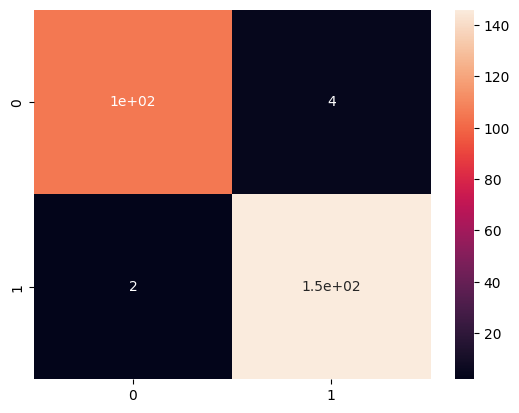

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict = gbm.predict(X_test)
y_predict = np.where(y_predict >= 0.5, 1, 0)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 2.556996 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4609711
[LightGBM] [Info] Number of data points in the train set: 771, number of used features: 48931
[LightGBM] [Info] Start training from score 0.474708
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

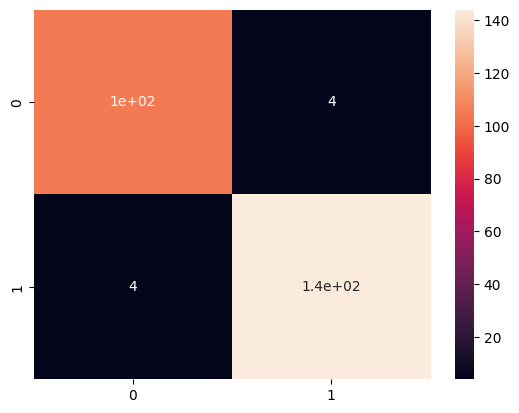

In [29]:
#normalized scaler - fit&transform on train, fit only on test
from sklearn.preprocessing import MinMaxScaler
n_scaler = MinMaxScaler()

X_train_scaled = n_scaler.fit_transform(X_train.astype(float))
X_test_scaled = n_scaler.transform(X_test.astype(float))

#Support Vector Classification model -  apply on scaled data
gbm.fit(X_train_scaled, y_train)

from sklearn.metrics import classification_report, confusion_matrix
y_predict_scaled = gbm.predict(X_test_scaled)
y_predict_scaled = np.where(y_predict_scaled >= 0.5, 1, 0)
cm = confusion_matrix(y_test, y_predict_scaled)
sns.heatmap(cm, annot=True)

print(classification_report(y_test, y_predict_scaled))

In [ ]:
#normalized scaler - fit&transform on train, fit only on test
from sklearn.preprocessing import MinMaxScaler
n_scaler = MinMaxScaler()

X_train_scaled = n_scaler.fit_transform(X_train.astype(float))
X_test_scaled = n_scaler.transform(X_test.astype(float))

param_grid = {
    'objective': ['binary'],
    'metric': ['rmse'],
    'num_leaves': [63],
    'learning_rate': [0.2],
    'n_estimators': [220],
    'verbose': [-1],
    'min_data_in_leaf': [50],
}

#Support Vector Classification model -  apply on scaled data
gbm.fit(X_train_scaled, y_train, parame)

from sklearn.metrics import classification_report, confusion_matrix
y_predict_scaled = gbm.predict(X_test_scaled)
y_predict_scaled = np.where(y_predict_scaled >= 0.5, 1, 0)
cm = confusion_matrix(y_test, y_predict_scaled)
sns.heatmap(cm, annot=True)

print(classification_report(y_test, y_predict_scaled))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END learning_rate=0.2, metric=rmse, min_data_in_leaf=40, n_estimators=220, num_leaves=63, objective=binary, verbose=-1;, score=0.932 total time= 1.4min
[CV 2/5] END learning_rate=0.2, metric=rmse, min_data_in_leaf=40, n_estimators=220, num_leaves=63, objective=binary, verbose=-1;, score=0.917 total time= 1.3min
[CV 3/5] END learning_rate=0.2, metric=rmse, min_data_in_leaf=40, n_estimators=220, num_leaves=63, objective=binary, verbose=-1;, score=0.839 total time= 1.5min
[CV 4/5] END learning_rate=0.2, metric=rmse, min_data_in_leaf=40, n_estimators=220, num_leaves=63, objective=binary, verbose=-1;, score=0.684 total time= 1.4min
[CV 5/5] END learning_rate=0.2, metric=rmse, min_data_in_leaf=40, n_estimators=220, num_leaves=63, objective=binary, verbose=-1;, score=0.858 total time= 1.4min
[CV 1/5] END learning_rate=0.2, metric=rmse, min_data_in_leaf=50, n_estimators=220, num_leaves=63, objective=binary, verbose=-1;, score

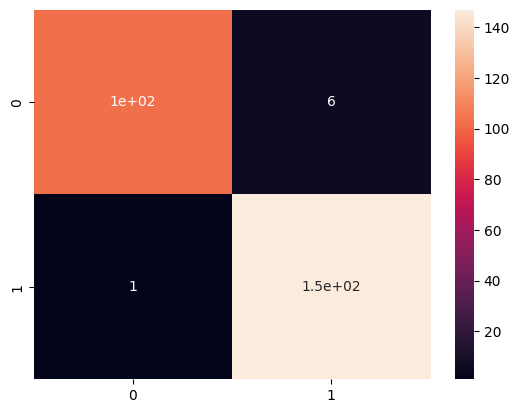

In [38]:
#find best hyper parameters
from sklearn.model_selection import GridSearchCV

param_grid = {
    'objective': ['binary'],
    'metric': ['rmse'],
    'num_leaves': [63],
    'learning_rate': [0.2],
    'n_estimators': [220],
    'verbose': [-1],
    'min_data_in_leaf': [50],
}

grid = GridSearchCV(gbm, param_grid, verbose = 4)
grid.fit(X_train_scaled,y_train)

print(grid.best_params_)
print(grid.best_estimator_)

grid_predictions = grid.predict(X_test_scaled)
grid_predictions = np.where(grid_predictions >= 0.5, 1, 0)

cmG = confusion_matrix(y_test,grid_predictions)
sns.heatmap(cmG, annot=True)

print(classification_report(y_test,grid_predictions))